# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.drop(columns=['duration'], axis =1, inplace=True)
# Converting type of columns to category 
df['job'] = df['job'].astype('category') 
df['marital'] = df['marital'].astype('category') 
df['education'] = df['education'].astype('category') 
df['default'] = df['default'].astype('category') 
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category') 
df['contact'] = df['contact'].astype('category') 
df['month'] = df['month'].astype('category') 
df['day_of_week'] = df['day_of_week'].astype('category') 
df['poutcome'] = df['poutcome'].astype('category') 
df['y'] = df['y'].astype('category') 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

Objective is to determine the features of the customer that impact the customers willingness to deposit as marked by column 'y'

In otherwords, what is the model that increases success as measured by high Y while reducing the number of contacts.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

In [8]:
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df[['job', 'marital','education','default','housing','loan']]).toarray(), columns=enc.get_feature_names_out()) 
  

# Merge with main 
New_df = enc_data.join(df[['age']])

In [9]:
X = New_df.drop(columns=['job_unknown','marital_unknown','education_unknown','housing_unknown',
                         'default_unknown','loan_unknown'], axis =1)


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin.                     41188 non-null  float64
 1   job_blue-collar                41188 non-null  float64
 2   job_entrepreneur               41188 non-null  float64
 3   job_housemaid                  41188 non-null  float64
 4   job_management                 41188 non-null  float64
 5   job_retired                    41188 non-null  float64
 6   job_self-employed              41188 non-null  float64
 7   job_services                   41188 non-null  float64
 8   job_student                    41188 non-null  float64
 9   job_technician                 41188 non-null  float64
 10  job_unemployed                 41188 non-null  float64
 11  marital_divorced               41188 non-null  float64
 12  marital_married                41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [30]:
#estabilish success
y=df['y']
#.map(({'yes':1,  'no':0}))

In [31]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
#train baseline
linreg = LinearRegression().fit(X_train, y_train)
pred = linreg.predict(X_train)

In [16]:
#find mean squared error on training data
train_mse = mean_squared_error(y_train, pred)
train_mse

0.09680186514870295

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression( max_iter = 2000)


In [18]:
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
train_mse = mean_squared_error(y_train, lgr.predict(X_train))
test_mse = mean_squared_error(y_test, lgr.predict(X_test))

print(train_mse)
print(test_mse)

0.112880774335567
0.11197436146450422


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

#Create models
svc = SVC()
logR = LogisticRegression(max_iter=2000) 
knn = KNeighborsClassifier()
dt= DecisionTreeClassifier()

In [32]:
#Run fit on models
import time
time1 = time.time()
svc.fit(X_train, y_train)
time2 = time.time()
logR.fit(X_train, y_train)
time3 = time.time()
knn.fit(X_train, y_train)
time4 = time.time()
dt.fit(X_train, y_train)
time5 = time.time()

In [36]:
#collect accuracy and times for each model
test_acc=[]
train_acc=[]
search_time=[]

#add Accuracy to db
train_acc.append(svc.score(X_train, y_train))
test_acc.append(svc.score(X_test, y_test))
train_acc.append(logR.score(X_train, y_train))
test_acc.append(logR.score(X_test, y_test))
train_acc.append(knn.score(X_train.values, y_train))
test_acc.append(knn.score(X_test.values, y_test))
train_acc.append(dt.score(X_train, y_train))
test_acc.append(dt.score(X_test, y_test))

#add time to db
search_time.append(time2-time1)
search_time.append(time3-time2)
search_time.append(time4-time3)
search_time.append(time5-time4)

C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
scores=pd.DataFrame()

scores['Model'] = ['SVM','Logistic Regression', 'KNN', 'Decision Tree']
scores['Training Time'] = search_time
scores['Train Accuracy'] = train_acc
scores['Test Accuracy'] = test_acc

scores.set_index('Model', inplace=True)

scores


,Training Time,Train Accuracy,Test Accuracy
Model,,,
SVM,15.441671,0.887119,0.888026
Logistic Regression,0.897097,0.887119,0.888026
KNN,0.031723,0.889126,0.878023
Decision Tree,0.109993,0.916966,0.864718


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

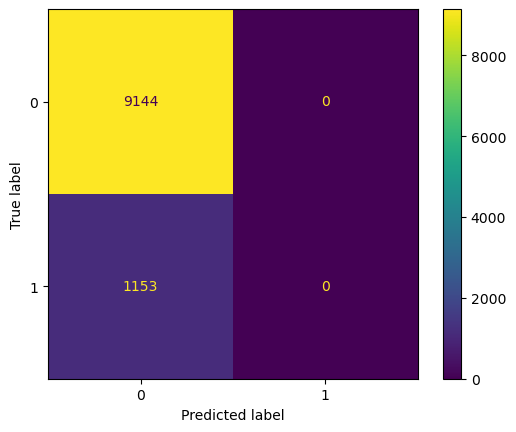

In [152]:
svc_confusion_mat = confusion_matrix(y_test, svc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_mat)
disp.plot()
plt.show()

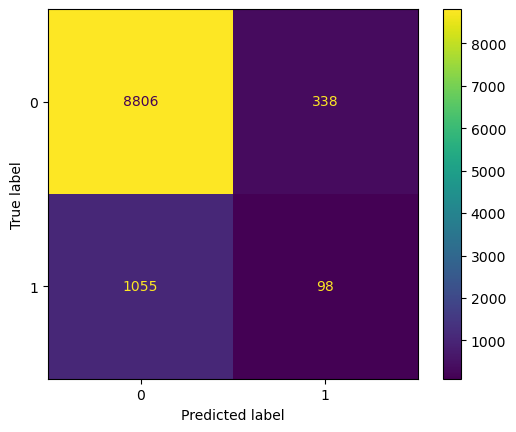

In [151]:
dt_confusion_mat = confusion_matrix(y_test, dt.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_mat)
disp.plot()
plt.show()

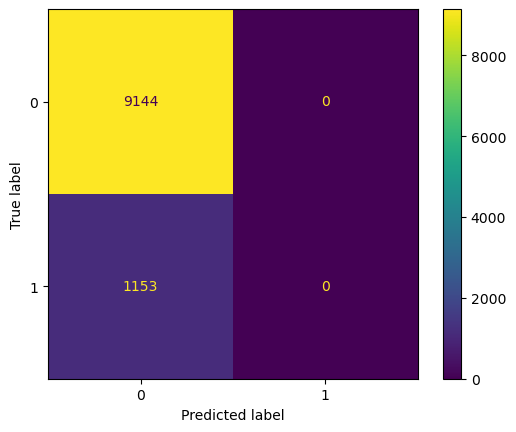

In [148]:
logr_confusion_mat = confusion_matrix(y_test, logR.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=logr_confusion_mat)
disp.plot()
plt.show()

C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


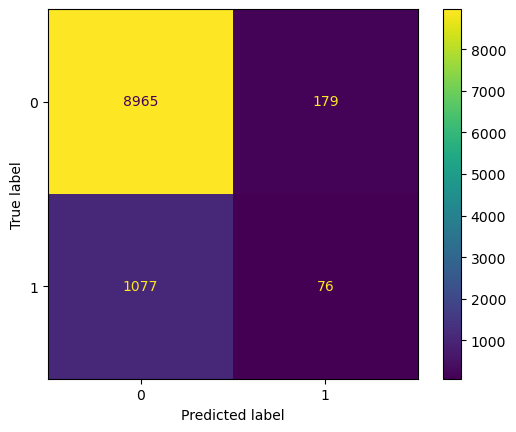

In [78]:
#Print confusion mat for knn
knn_confusion_mat = confusion_matrix(y_test, knn.predict(X_test.values))
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat)
disp.plot()
plt.show()

In [79]:
# normalize dataset for easier parameter selection and switching to average_precision to increase predicted True
scale = StandardScaler()

X_scale = pd.DataFrame(scale.fit_transform(X), columns= scale.get_feature_names_out())

In [80]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scale, y, random_state=36)

In [87]:
#Range of variables
paramsKNN={'knn__n_neighbors': range(20,50)}

#Create pipe
knn_pipe = Pipeline([ ('knn', KNeighborsClassifier())])

#Create grid to search best variables
eval_knn = GridSearchCV(estimator=knn_pipe,param_grid=paramsKNN, scoring='accuracy',
                         return_train_score=True)



In [89]:
eval_knn.fit(X1_train.values, y1_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(2, 35)},
             return_train_score=True, scoring='accuracy')

In [91]:

print(eval_knn.score(X1_train.values, y1_train))

best_acc = eval_knn.score(X1_test.values, y1_test)

print(best_acc)

print(eval_knn.best_params_)

0.8884464730827749
0.8868602505584151
{'knn__n_neighbors': 27}


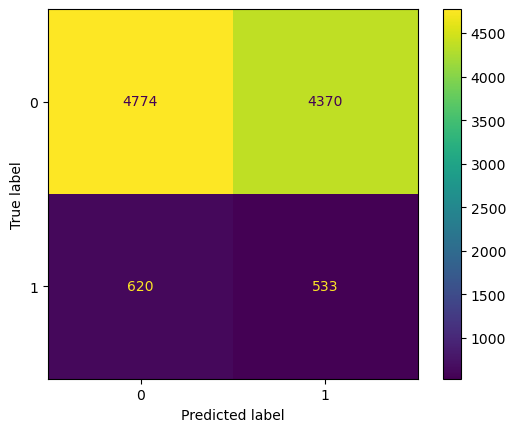

In [92]:
#Print confusion mat for dt
knn_confusion_mat = confusion_matrix(y_test, eval_knn.predict(X_test.values))
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat)
disp.plot()
plt.show()

In [95]:
best_est = eval_knn.best_estimator_.fit(X1_train, y1_train)

In [ ]:
#Additional evaluation and changes to the data (see below), fail to improve the number of contacts in the true positive.
#Additional changes do indicate that future review/analysis should be done on the basis of time available and prior activity.
#For example, LogisticRegression showed that ages under 27 and above 60 had higher positive responses than other age groups.  
#In addition,job roles impacted the scores with unemployed and housewife least likely to be positive but student and retired 
#were higher.

In [37]:
#evaluate for multiple parameters
paramsLogr ={'logr__penalty': ['l1','l2'],
            'logr__solver':['lbfgs','liblinear','saga']}

logr_pipe = Pipeline([ ('logr', LogisticRegression())])

campaign_logr = GridSearchCV(estimator=logr_pipe,param_grid=paramsLogr, scoring='average_precision',
                         return_train_score=True)



In [38]:
#fit variables
campaign_logr.fit(X1_train, y1_train)

C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(estimator=Pipeline(steps=[('logr', LogisticRegression())]),
             param_grid={'logr__penalty': ['l1', 'l2'],
                         'logr__solver': ['lbfgs', 'liblinear', 'saga']},
             return_train_score=True, scoring='average_precision')

In [39]:

print(campaign_logr.score(X1_train, y1_train))

best_acc = campaign_logr.score(X1_test, y1_test)

print(best_acc)
#print(gettime(campaign_logr))
print(campaign_logr.best_params_)

0.20123362946538362
0.20139431760617932
{'logr__penalty': 'l1', 'logr__solver': 'saga'}


In [40]:
best_est = campaign_logr.best_estimator_.fit(X1_train, y1_train)


C:\Users\ryd_d\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:

a = best_est['logr'].coef_[:, None].T
b = best_est['logr'].feature_names_in_[:, None]


for i in range(0,28):
    print(a[i], b[i])


[[0.02582012]] ['job_admin.']
[[-0.12677909]] ['job_blue-collar']
[[-0.05108031]] ['job_entrepreneur']
[[0.00242585]] ['job_housemaid']
[[-0.0107666]] ['job_management']
[[0.14766161]] ['job_retired']
[[-0.03520486]] ['job_self-employed']
[[-0.05546872]] ['job_services']
[[0.18745292]] ['job_student']
[[-0.02549906]] ['job_technician']
[[0.03938812]] ['job_unemployed']
[[-0.07036534]] ['marital_divorced']
[[-0.07100347]] ['marital_married']
[[0.08338366]] ['marital_single']
[[-0.04608768]] ['education_basic.4y']
[[-0.02221495]] ['education_basic.6y']
[[-0.0865229]] ['education_basic.9y']
[[-0.07213058]] ['education_high.school']
[[0.01961895]] ['education_illiterate']
[[-0.03584609]] ['education_professional.course']
[[0.01897832]] ['education_university.degree']
[[0.38684445]] ['default_no']
[[-0.02497576]] ['default_yes']
[[-0.031394]] ['housing_no']
[[0.]] ['housing_yes']
[[-0.0126046]] ['loan_no']
[[-0.01843624]] ['loan_yes']
[[0.15341336]] ['age']


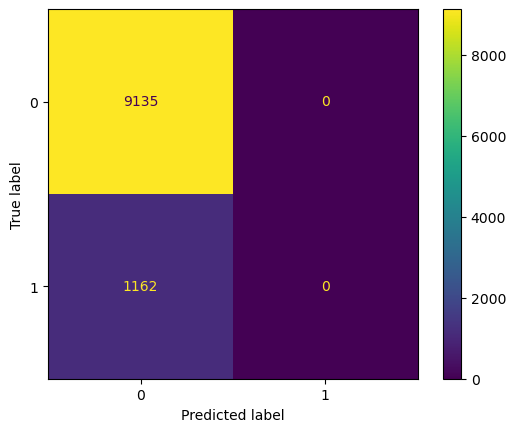

In [43]:
#Find best soluation and print result
logr_confusion_mat = confusion_matrix(y1_test, campaign_logr.best_estimator_.predict(X1_test))
disp = ConfusionMatrixDisplay(confusion_matrix=logr_confusion_mat)
disp.plot()
plt.show()

In [114]:
#Experiments using data from original analysis

#Positive impact:
#  default_no - highest, do we want to weight this more: may want to drop default-yes as it seems to have little impact.
#  age - may want to split this into bins 
#  job_retired and job_student are positive but lesser

#Negative impact:
#  job_blue-collar - highest - does this indicate lack of time or energy related to how busy the day is? This is partially
#      collaborated with the small spike for unemployed, married vs single may also relate to this.
#  marital_divorced and marital_married - ? could this be related to time/money, may be interesting to track #of kids in future
#  job_services  - maybe related to the time/energy as mentioned above
# education_basic.9y and education_high.school are impactful - could these be students? Query

#drop all other fields for low impact
#Result was 0 TP.

#Additional changes to data were experimented with as commented on:

In [115]:
X['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [116]:
#break age into groups, <25, <45, <60, and 60+

In [142]:
X_new = X.copy(deep=True)

In [136]:
#Age break was not used in final approach
#X_new['age25'] = np.where(X['age'] <= 27, 1, 0)
#X_new['age45'] = np.where(((X['age'] <= 45) & (X['age'] > 27)), 1, 0)
#X_new['age60'] = np.where(((X['age'] < 59) & (X['age'] > 45)), 1, 0)
#X_new['age60plus'] = np.where(X['age'] >= 59, 1, 0)


In [124]:
#Age sq, inverse, or age cubed did not improve results.
#X_new['inv_age_sq'] = -(X['age']**2)

In [143]:
#Removing these columns did seem to improve the results.
X_new.drop(columns=['job_housemaid', 'housing_no',
                     'loan_no'], axis=1, inplace=True)

In [144]:
#Rebuild scale and samples
X2_scale = pd.DataFrame(scale.fit_transform(X_new), columns= scale.get_feature_names_out())

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scale, y, random_state=43)



In [145]:
#fit variables
eval_knn.fit(X2_train.values, y2_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(2, 35)},
             return_train_score=True, scoring='accuracy')

In [146]:
print(eval_knn.score(X2_train.values, y2_train))

best_acc = eval_knn.score(X2_test.values, y2_test)

print(best_acc)
#print(gettime(campaign_logr))
print(eval_knn.best_params_)

0.8886730763005406
0.8839467806157133
{'knn__n_neighbors': 24}


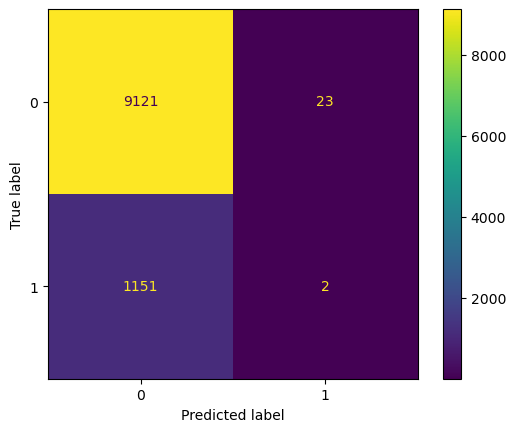

In [147]:
#Print confusion mat for dt
knn_confusion_mat = confusion_matrix(y_test, eval_knn.predict(X2_test.values))
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat)
disp.plot()
plt.show()

In [111]:
best_est = eval_logr.best_estimator_.fit(X2_train, y2_train)
a = best_est['logr'].coef_[:, None].T
b = best_est['logr'].feature_names_in_[:, None]


for i in range(0,26):
    print(a[i], b[i])

KeyError: 'logr'

In [ ]:
#Now that age is refined.  Drop other values that are now less than +/-0.02


In [ ]:
#drop fields as planned and rerun logR
X_new.drop(columns=['age60','age45','education_illiterate', 
                    'education_university.degree', 'job_admin.',
                   'job_self-employed','job_technician'], axis=1, inplace=True)

In [ ]:
#Rebuild scale and samples
X2_scale = pd.DataFrame(scale.fit_transform(X_new), columns= scale.get_feature_names_out())

X3_train, X3_test, y3_train, y3_test = train_test_split(X2_scale, y, random_state=43)



In [ ]:
#fit variables
campaign_logr.fit(X3_train, y3_train)

In [ ]:
print(campaign_logr.score(X3_train, y3_train))

best_acc = campaign_logr.score(X3_test, y3_test)

print(best_acc)
#print(gettime(campaign_logr))
print(campaign_logr.best_params_)

In [ ]:
best_est = campaign_logr.best_estimator_.fit(X2_train, y2_train)
a = best_est['logr'].coef_[:, None].T
b = best_est['logr'].feature_names_in_[:, None]


for i in range(0,18):
    print(a[i], b[i])

In [ ]:
#Find best soluation and print result
logr_confusion_mat = confusion_matrix(y3_test, campaign_logr.best_estimator_.predict(X3_test))
disp = ConfusionMatrixDisplay(confusion_matrix=logr_confusion_mat)
disp.plot()
plt.show()

In [ ]:
#Never mark something as true so switching to precision
campaign1_logr = GridSearchCV(estimator=logr_pipe,param_grid=paramsLogr, scoring='average_precision',
                         return_train_score=True)


In [ ]:
#fit variables
campaign1_logr.fit(X3_train, y3_train)

In [ ]:
print(campaign1_logr.score(X3_train, y3_train))

best_acc = campaign1_logr.score(X3_test, y3_test)

print(best_acc)
print(campaign1_logr.best_params_)

In [ ]:
#Find best soluation and print result
logr_confusion_mat = confusion_matrix(y3_test, campaign1_logr.best_estimator_.predict(X3_test))
disp = ConfusionMatrixDisplay(confusion_matrix=logr_confusion_mat)
disp.plot()
plt.show()

In [ ]:
#Adding age**2 and age*loan_yes
X_new['age_sq'] = X['age']**2

X_new['age_sq_loans'] = (X['age']**2)*X['loan_yes']

X_new['age_sq_default_loan'] = (X['age']**2)*(X['default_yes']+X['loan_yes'])

X_new['no_default_loan_yes'] = (X['default_no']+X['loan_yes'])*100

X_new['default_loan_yes'] = (X['default_yes']+X['loan_yes'])*100

X_new['no_default_loan'] = (X['default_no']+X['loan_no'])*100


In [ ]:
#Combine 4yr, 6yr and 9yr schooling
X_new['adv_school'] = X['education_basic.4y']+X['education_basic.6y']+X['education_basic.9y']+X['education_university.degree']


In [ ]:
X_new = X_new.drop(columns=['education_basic.4y', 'education_basic.6y',
                            'education_basic.9y','education_university.degree',
                            'loan_no','default_no'], axis=0)



In [ ]:
X_new.info()

In [ ]:
y_new = df['y']
y_new.info()

In [ ]:
# normalize dataset for easier parameter selection
scale = StandardScaler()

X_scale = pd.DataFrame(scale.fit_transform(X_new), columns= scale.get_feature_names_out())

In [ ]:
X_scale.info()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scale, y_new, random_state=43)

In [ ]:
#Range of variables
paramsKNN={'knn__n_neighbors': range(15,25),
           'knn__algorithm': ['auto','ball_tree','kd_tree'],
           'knn__weights': ['uniform','distance' ]}

#Create pipe
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])

#Create grid to search best variables
campaign_knn = GridSearchCV(estimator=knn_pipe,param_grid=paramsKNN, scoring='accuracy',
                         return_train_score=True)


In [ ]:
#fit variables
campaign_knn.fit(X1_train.values, y1_train)

In [ ]:
best_dtc = list(campaign_knn.best_params_.values())

print(campaign_knn.score(X1_train.values, y1_train))

print(best_dtc)

In [ ]:
best_acc = campaign_knn.score(X1_test.values, y1_test)

print(best_acc)
#print(gettime(campaign_knn))
print(campaign_knn.best_params_)

In [ ]:
#LogR

In [ ]:
paramsLogr ={'logr__C': [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003],
            'logr__penalty': ['l1','l2'],
            'logr__solver':['lbfgs','liblinear','saga']}

logr_pipe = Pipeline([ ('logr', LogisticRegression())])

campaign_logr = GridSearchCV(estimator=logr_pipe,param_grid=paramsLogr, scoring='accuracy',
                         return_train_score=True)



In [ ]:
#fit variables
campaign_logr.fit(X1_train, y1_train)

In [ ]:


print(campaign_logr.score(X1_train, y1_train))

best_acc = campaign_logr.score(X1_test, y1_test)

print(best_acc)
#print(gettime(campaign_logr))
print(campaign_logr.best_params_)

In [ ]:
best_est = campaign_logr.best_estimator_.fit(X1_train, y1_train)

In [ ]:

best_est['logr'].coef_

In [ ]:
best_est['logr'].feature_names_in_

In [ ]:
#SVC

In [ ]:

paramsSVC = {'svc__kernel': ['linear', 'sigmoid'],
# paramsSVC = {'svc__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'svc__gamma': [0.0005, 0.001]}


#Unable to run all parameters so below are the tests and the best results from each test.
#Test 1:  all gamma with linear and Sigmoid - best was 
#Test 2: 0.01, 0.1 with linear and poly, best was 
#Test 3:  0.05, 0.1 with rbf and poly, best was 
#Test 4: 0.09, 0.1, 0.2 with rbf, best was 0.2 and rbf
#Test 5: 0.2, 0.5 with rbf, best remained 0.2 and rbf.

svc_pipe = Pipeline([ ('svc', SVC())])

campaign_svc = GridSearchCV(estimator=svc_pipe,param_grid=paramsSVC, scoring='accuracy',
                         return_train_score=True)

In [ ]:
#fit variables
campaign_svc.fit(X1_train, y1_train)

In [ ]:
best_dtc = list(campaign_svc.best_params_.values())

print(campaign_svc.score(X1_train.values, y1_train))

print(best_dtc)

best_acc = campaign_svc.score(X1_test.values, y1_test)

print(best_acc)
#print(gettime(campaign_logr))
print(campaign_svc.best_params_)

In [ ]:
#Decision Tree - likely the best option

In [ ]:


paramsDT = {'dt__criterion':['gini', 'entropy', 'log_loss'],
         'dt__max_depth': [3, 10, 30],
         'dt__min_samples_split': [0.1, 0.11, 0.09]}

dt_pipe = Pipeline([('dt', DecisionTreeClassifier())])

campaign_dt = GridSearchCV(estimator=dt_pipe,param_grid=paramsDT, scoring='accuracy',
                         return_train_score=True)


In [ ]:
#fit variables
campaign_dt.fit(X1_train, y1_train)

In [ ]:
best_dtc = list(campaign_dt.best_params_.values())

print(campaign_dt.score(X1_train, y1_train))

print(best_dtc)

best_acc = campaign_dt.score(X1_test, y1_test)

print(best_acc)
#print(gettime(campaign_logr))
print(campaign_dt.best_params_)

In [ ]:
best_est = campaign_dt.best_estimator_.fit(X1_train, y1_train)

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(best_est['dt'])

##### Questions